# Random Forest

In finance, a loan is the lending of money by one or more individuals, organizations, or other entities to other individuals, organizations, etc. The recipient (i.e. the borrower) incurs a debt, and is usually liable to pay interest on that debt until it is repaid, and also to repay the principal amount borrowed. The whole process of ascertaining if a burrower would pay back loans might be tedious hence the need to <b>automate the procedure.</b>

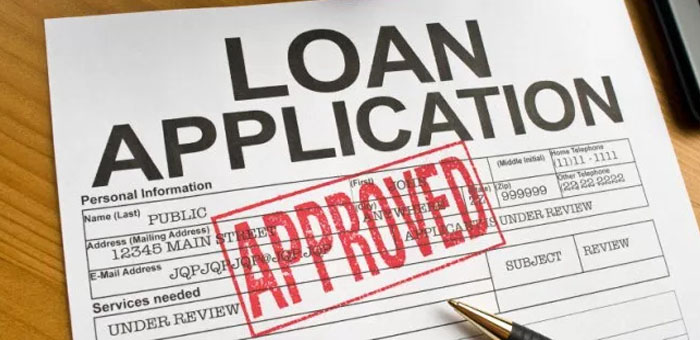

Objective: Predict which of the customers will have their loan paid or not. It is a classification problem.
Dataset : 

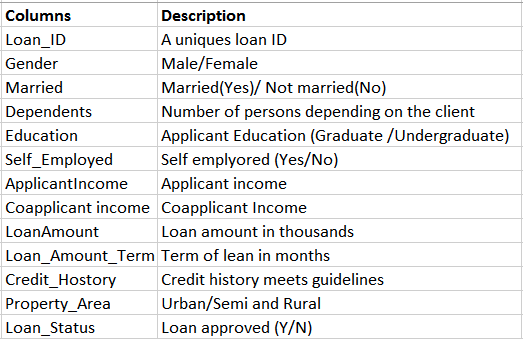

## Data Aquisition and Formating

In [1]:
# Import Libraries

In [2]:
import pandas as pd
import numpy as np
import sweetviz as sv

In [3]:
# Importing dataset
loan_df = pd.read_csv('dataset.csv')

In [4]:
loan_df.shape # 614 rows and 12 features

(614, 13)

In [5]:
display(loan_df)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


## EDA : Exploratory Data Analysis

Let's analyse the dataset using different libraries (plots) and perform some analysis.

In [6]:
total = loan_df.isnull().sum().sort_values(ascending=False)
percent = (loan_df.isnull().sum()/loan_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Credit_History,50,0.081433
Self_Employed,32,0.052117
LoanAmount,22,0.035831
Dependents,15,0.024430
Loan_Amount_Term,14,0.022801
Gender,13,0.021173
Married,3,0.004886
Loan_Status,0,0.000000
Property_Area,0,0.000000
CoapplicantIncome,0,0.000000


In [7]:
# Seaborn is a Python data visualization library based on matplotlib. 
# It provides a high-level interface for drawing attractive and informative statistical graphics.
import seaborn as sns
%matplotlib inline

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<AxesSubplot:xlabel='count', ylabel='Gender'>

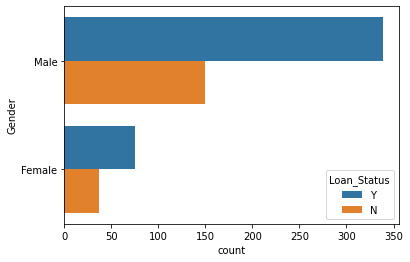

In [8]:
sns.countplot(y = 'Gender', hue = 'Loan_Status', data =loan_df )

<AxesSubplot:xlabel='count', ylabel='Married'>

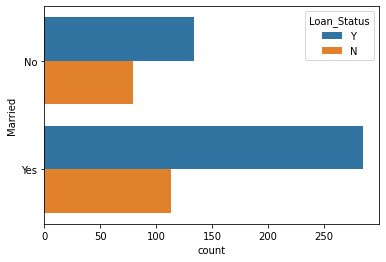

In [9]:
sns.countplot(y = 'Married', hue = 'Loan_Status', data =loan_df )

<AxesSubplot:xlabel='count', ylabel='Self_Employed'>

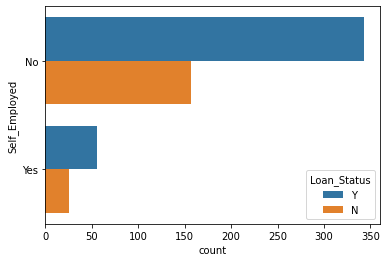

In [10]:
sns.countplot(y = 'Self_Employed', hue = 'Loan_Status', data =loan_df )

<AxesSubplot:xlabel='count', ylabel='Credit_History'>

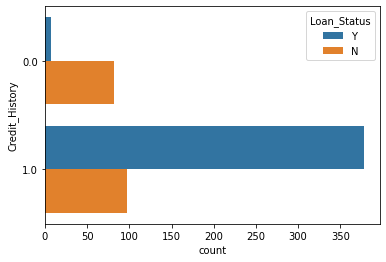

In [11]:
sns.countplot(y = 'Credit_History', hue = 'Loan_Status', data =loan_df )

<AxesSubplot:xlabel='count', ylabel='Property_Area'>

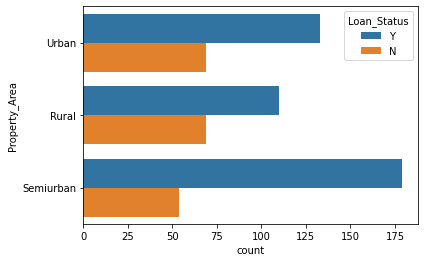

In [12]:
sns.countplot(y = 'Property_Area', hue = 'Loan_Status', data =loan_df )

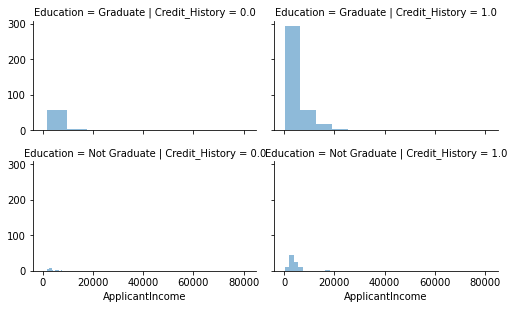

In [13]:
import matplotlib.pyplot as plt

grid = sns.FacetGrid(loan_df, row='Education', col='Credit_History', height=2.2, aspect=1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha =.5, bins=10)
grid.add_legend()

Some insights: 
- More males are on loan than females. Also, those that are on loan are more than otherwise
- Married people collect more loan than unmarried
- The category of those that take loans is less of self-employed people. That’s those are not self-employed probably salalary earners obtain more loan.
- According to the credit history, greater number of people pay back their loans.
- Semiurban obtain more loan, folowed by Urban and then rural. 
- Educated with good credit history depicts a good income. Also, not a graduate and have a good credit history can be traced to having a better income than a fellow with no degree

## Inputations

In [14]:
# We have in this dataset categorical variables and also missing values.

In [15]:
# I will impute the missing values in the categorical variables with the mode,
# and for the continuous variables, with the mean (for the respective columns). 
# Also, we will be label encoding the categorical values in the data
# Note : The mode of a set of values is the value that appears most often. It can be multiple values.

In [16]:
loan_df['Gender']        =loan_df['Gender'].map({'Male':1,'Female':0})
loan_df['Married']       =loan_df['Married'].map({'Yes':1,'No':0})
loan_df['Education']     =loan_df['Education'].map({'Graduate':1,'Not Graduate':0})
loan_df['Dependents'].replace('3+',3,inplace=True)
loan_df['Self_Employed'] =loan_df['Self_Employed'].map({'Yes':1,'No':0})
loan_df['Property_Area'] =loan_df['Property_Area'].map({'Semiurban':1,'Urban':2,'Rural':3})
loan_df['Loan_Status']   =loan_df['Loan_Status'].map({'Y':1,'N':0})

#Null Value Imputation
rev_null=['Gender','Married','Dependents','Self_Employed','Credit_History','LoanAmount','Loan_Amount_Term']
loan_df[rev_null]=loan_df[rev_null].replace({np.nan:loan_df['Gender'].mode(),
                                   np.nan:loan_df['Married'].mode(),
                                   np.nan:loan_df['Dependents'].mode(),
                                   np.nan:loan_df['Self_Employed'].mode(),
                                   np.nan:loan_df['Credit_History'].mode(),
                                   np.nan:loan_df['LoanAmount'].mean(),
                                   np.nan:loan_df['Loan_Amount_Term'].mean()})

Let's come back with sweetviz library

In [17]:
loan_report = sv.analyze(loan_df)

:FEATURES DONE:                    |█████████████████████| [100%]   00:03  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:00  -> (00:00 left)


Creating Associations graph... DONE!


In [18]:
loan_report.show_html()

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


Let's look more close some correlations that SWEETVIZ_REPORT.html is showing  ...

In [19]:
display(loan_df)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0.0,1,0.0,5849,0.0,342.0,360.0,1.0,2,1
1,LP001003,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,3,0
2,LP001005,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0.0,0.0,0.0,1,0.0,2900,0.0,71.0,360.0,1.0,3,1
610,LP002979,1.0,1.0,3.0,1,0.0,4106,0.0,40.0,180.0,1.0,3,1
611,LP002983,1.0,1.0,1.0,1,0.0,8072,240.0,253.0,360.0,1.0,2,1
612,LP002984,1.0,1.0,2.0,1,0.0,7583,0.0,187.0,360.0,1.0,2,1


In [20]:
# Now let's create the Feature Vector and Labels

In [21]:
X = loan_df.drop(columns=['Loan_ID','Loan_Status']).values
y = loan_df['Loan_Status'].values

In [22]:
# Now, let’s split the dataset in an 80:20 ratio for training (80%) and test (20%) :

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [24]:
# Let’s take a look at the shape of the created train and test sets:

In [25]:
print('Shape of X_train=>',X_train.shape)
print('Shape of X_test=>',X_test.shape)
print('Shape of Y_train=>',y_train.shape)
print('Shape of Y_test=>',y_test.shape)

Shape of X_train=> (491, 11)
Shape of X_test=> (123, 11)
Shape of Y_train=> (491,)
Shape of Y_test=> (123,)


In [26]:
# Step 4: Building and Evaluating the Model using a Decision Tree

In [27]:
# Building Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [28]:
# Evaluation on Training set
from sklearn.metrics import f1_score
dt_pred_train = dt.predict(X_train)

# Let's use one metric to have a idea about model acuracy and explain more in other examples these metrics.
print('Training Set Evaluation F1-Score=>',f1_score(y_train,dt_pred_train))

Training Set Evaluation F1-Score=> 1.0


In [29]:
# Value (1 or 100%) Expected given that we are using the same train dataset 

In [30]:
# Evaluation on Test set

In [31]:
dt_pred_test = dt.predict(X_test)
print('Testing Set Evaluation F1-Score=>',f1_score(y_test,dt_pred_test))

Testing Set Evaluation F1-Score=> 0.7953216374269005


In [32]:
# Here, you can see that the decision tree performs well on in-sample evaluation,
# but its performance decreases drastically on out-of-sample evaluation.
# Why do you think that’s the case? 
# Unfortunately, our decision tree model is overfitting on the training data. 
# We can try to improve using hyper-paramenters, but let's see what happen 
# when whe replace the algorithm from "decision trees" to "Ramdom forest"

In [33]:
# Building  Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(criterion = 'entropy', n_estimators = 100, random_state = 42)
rfc.fit(X_train, y_train)

# Evaluating on Training set
rfc_pred_train = rfc.predict(X_train)
print('Training Set Evaluation F1-Score=>',f1_score(y_train,rfc_pred_train))

Training Set Evaluation F1-Score=> 1.0


In [34]:
# Evaluating on Test set
rfc_pred_test = rfc.predict(X_test)
print('Testing Set Evaluation F1-Score=>',f1_score(y_test,rfc_pred_test))

Testing Set Evaluation F1-Score=> 0.8461538461538461


In [35]:
# Here, we can clearly see that the random forest model performed much better than the decision tree
# in the out-of-sample evaluation.  Let’s discuss the reasons behind this ...

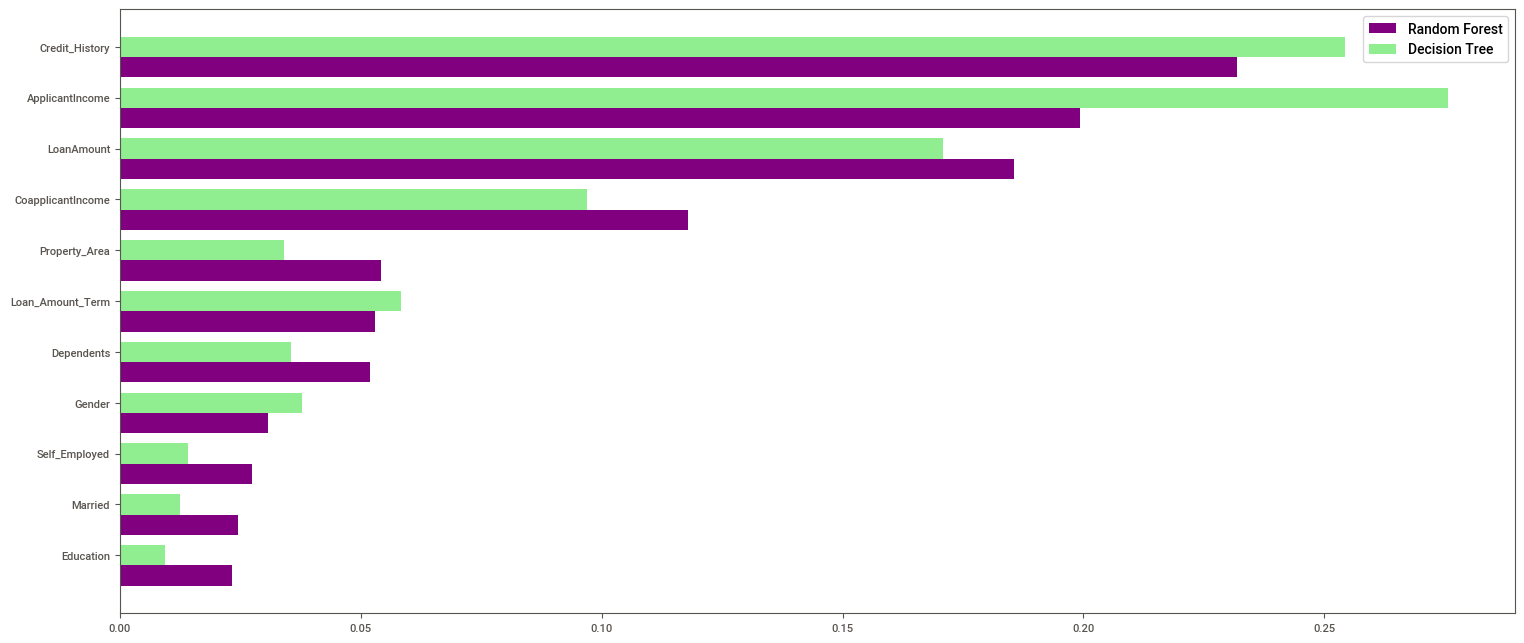

In [36]:
feature_importance=pd.DataFrame(
    {
    'rfc':rfc.feature_importances_,
    'dt' :dt.feature_importances_},
    index = loan_df.drop(columns=['Loan_ID','Loan_Status']).columns)

feature_importance.sort_values(by='rfc',ascending=True,inplace=True)

index = np.arange(len(feature_importance))

fig, ax = plt.subplots(figsize=(18,8))
rfc_feature=ax.barh(index,feature_importance['rfc'],0.4,color='purple',label='Random Forest')
dt_feature=ax.barh(index+0.4,feature_importance['dt'],0.4,color='lightgreen',label='Decision Tree')
ax.set(yticks=index+0.4,yticklabels=feature_importance.index)

ax.legend()
plt.show()

In [37]:
# Decision tree model gives high importance to a particular set of features. 
# Random forest chooses features randomly during the training process. 
 # Therefore, it does not depend highly on any specific set of features. 
 # This is a special characteristic of random forest over bagging trees.
 # Therefore, the random forest can generalize over the data in a better way. 
 # This randomized feature selection makes random forest much more accurate than a decision tree.

In [38]:
# Random Forest is suitable for situations when we have
# a large dataset, and interpretability is not a major concern.

## Decision trees are much easier to interpret and understand. 
## Since a random forest combines multiple decision trees, 
## it becomes more difficult to interpret. Here’s the good news
## – it’s not impossible to interpret a random forest. 

# Also, Random Forest has a higher training time than a single decision tree.
# You should take this into consideration because as we increase the number of trees
# in a random forest, the time taken to train each of them also increases. 
# That can often be crucial when you’re working with a tight deadline in a machine learning project.

# But I will say this – despite instability and dependency on a particular set of features, 
# decision trees are really helpful because they are easier to interpret and faster to train.
# Anyone with very little knowledge of data science can also use decision trees to make quick data-driven decisions.